In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
%matplotlib inline

In [14]:
olhc_6 = pd.read_csv('olhc_6.csv')
olhc_6.head()

,Date,open,high,low,close,volume,sub_density,diameter,average_shortest_path_length,average_clustering,...,number_of_nodes,number_of_nodes_for_largest_subgraph,number_of_edges_for_largest_subgraph,average_degree,average_degree_sub,bins,pr,pagerank,ci,ci_sum
0,2014/12/2,-0.4820,3.6047,-0.5616,3.08,437700,0.001718,17,7.113971,0.002588,...,2709,1269,1382,1.809524,2.178093,"(1.4, 4.2]",0.030927,0.030927,15225,64672
1,2014/12/3,0.1940,2.2025,-1.0657,0.59,562100,0.005051,2,1.994962,0.000000,...,3517,397,397,1.839067,2.000000,"(0.0, 1.4]",0.460111,0.460111,20002,90681
2,2014/12/4,0.1343,4.3447,-0.2628,4.34,532700,0.000493,17,5.356456,0.005365,...,6806,4483,4954,1.988833,2.210127,"(4.2, 10.0]",0.038970,0.038970,1040588,3545908
3,2014/12/5,0.9037,2.6778,-3.0103,1.32,640500,0.000616,16,5.836187,0.004919,...,5870,3578,3945,1.933220,2.205143,"(0.0, 1.4]",0.024525,0.024525,336622,1333848
4,2014/12/8,-1.0537,3.5006,-2.0054,2.82,587600,0.000964,19,6.281437,0.002962,...,4185,2310,2570,1.889128,2.225108,"(1.4, 4.2]",0.026345,0.026345,89760,387569


In [3]:
hddf = pd.read_csv('C:/Users/Lenovo/yan/D/数据/hddf.csv')
hddf.head()

,Unnamed: 0,date,open,high,low,close,volume,anger,disgust,joy,sadness,fear,su,bins,DAJ,DDJ,DSJ,DFJ,DNP
0,0,2014/12/2,-0.4820,3.6047,-0.5616,3.08,437700,3151,4059,6675,1045,6092,21732,"(1.4, 4.2]",-0.326003,-0.216032,-0.805335,-0.039691,0.353287
1,1,2014/12/3,0.1940,2.2025,-1.0657,0.59,562100,3823,4633,9353,1435,7412,27462,"(0.0, 1.4]",-0.388547,-0.305089,-0.814099,-0.101016,0.286944
2,2,2014/12/4,0.1343,4.3447,-0.2628,4.34,532700,5060,7280,12161,2836,10107,39274,"(4.2, 10.0]",-0.380819,-0.222838,-0.632263,-0.080347,0.348208
3,3,2014/12/5,0.9037,2.6778,-3.0103,1.32,640500,4453,7438,11557,2443,10114,37434,"(0.0, 1.4]",-0.414192,-0.191389,-0.674922,-0.057922,0.350069
4,4,2014/12/8,-1.0537,3.5006,-2.0054,2.82,587600,3965,5384,8904,1496,9066,29860,"(1.4, 4.2]",-0.351342,-0.218480,-0.774654,0.007831,0.371723


In [3]:
olhc_n = pd.read_csv('/Users/Kay/论文/2023-Loss Aversion/李洪瑶/社交网络/olhc_n.csv')
olhc_n.head()

,Date,open,high,low,close,volume,Network diameter,The average shortest path length of the network,The average clustering coefficient of the network,The average degree centrality of the network,Number of network nodes,number_of_nodes_for_largest_subgraph,The average degree of the network,bins,pagerank,ci_max,ci_global,retweeted,su,original
0,2014/12/2,-0.4820,3.6047,-0.5616,3.08,437700,17,7.113971,0.002588,0.001718,2709,1269,1.809524,"(1.4, 4.2]",0.030927,15225,64672,2808,21732,18924
1,2014/12/3,0.1940,2.2025,-1.0657,0.59,562100,2,1.994962,0.000000,0.005051,3517,397,1.839067,"(0.0, 1.4]",0.460111,20002,90681,3782,27462,23680
2,2014/12/4,0.1343,4.3447,-0.2628,4.34,532700,17,5.356456,0.005365,0.000493,6806,4483,1.988833,"(4.2, 10.0]",0.038970,1040588,3545908,7932,39274,31342
3,2014/12/5,0.9037,2.6778,-3.0103,1.32,640500,16,5.836187,0.004919,0.000616,5870,3578,1.933220,"(0.0, 1.4]",0.024525,336622,1333848,6567,37434,30867
4,2014/12/8,-1.0537,3.5006,-2.0054,2.82,587600,19,6.281437,0.002962,0.000964,4185,2310,1.889128,"(1.4, 4.2]",0.026345,89760,387569,4630,29860,25230


In [25]:
change_2002 = pd.read_csv('C:/Users/Lenovo/yan/D/数据/2002.csv')
change_2002['close'].describe()

count    3576.000000
mean        0.030898
std         1.674599
min        -8.840626
25%        -0.738919
50%         0.060365
75%         0.848390
max         9.455138
Name: close, dtype: float64

In [68]:
from scipy import stats
qt = stats.scoreatpercentile(change_2002["close"],[1,99])
change_2002['new'] = change_2002['close'][(change_2002['close']>qt[0])&(change_2002['close']<qt[1])]
change_2002['new'].describe()

count    3504.000000
mean        0.038437
std         1.427449
min        -5.248541
25%        -0.724368
50%         0.060365
75%         0.831589
max         4.314802
Name: new, dtype: float64

# 分组

In [4]:
bins = [-10,-4.2,-1.4,0,1.4,4.2,10]

In [5]:
olhc_6['bins'] = pd.cut(olhc_6['close'], bins)
df_bins = olhc_6['bins'].value_counts().to_frame()
df_bins.index.names = ['Bins']
df_bins.sort_index(ascending=True, inplace=True)
#df_bins.to_csv('df_bins.csv')
df_bins

NameError: name 'olhc_6' is not defined

In [21]:
ira_c = sns.light_palette("red", 7)
all_c = sns.light_palette("green", 7)
ira_c

[(0.9522635075378764, 0.9411073728435433, 0.940983659029102),
 (0.960125988649285, 0.7861014526104891, 0.7859981151890145),
 (0.9681756716919175, 0.6274049152290289, 0.6273224393527347),
 (0.9762253547345502, 0.46870837784756864, 0.46864676351645473),
 (0.9840878358459588, 0.31370245761451443, 0.3136612196763674),
 (0.9921375188885914, 0.15500592023305415, 0.15498554384008734),
 (1.0, 0.0, 0.0)]

In [20]:
all_c

[(0.9197652656492237, 0.9527224554855785, 0.9196755184291893),
 (0.768274516012881, 0.8784793567043322, 0.768199550687911),
 (0.6131768437661491, 0.8024685650949609, 0.6131170122861263),
 (0.4580791715194173, 0.7264577734855896, 0.4580344738843413),
 (0.30658842188307456, 0.6522146747043431, 0.3065585061430631),
 (0.15149074963634268, 0.5762038830949718, 0.15147596774127825),
 (0.0, 0.5019607843137255, 0.0)]

In [8]:
var = ['$Diameter$', 
       '$L_{s}$',
       'The average degree centrality of the network',
       '$N$',
       '$d_{avg}$',
       'The average degree of the largest subgraph',
       'network density of the largest subgraph',
       'ci_max',
       '$CI_{top}$']

# pointplot

/var/folders/c9/pbp698d91wq6k8cv8vw5lkbh0000gp/T/ipykernel_83123/3639851664.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x = 'bins',y = var[i],data = olhc_n,ax = ax,join = False,ci = 'sd',


ValueError: Could not interpret input '$Diameter$'

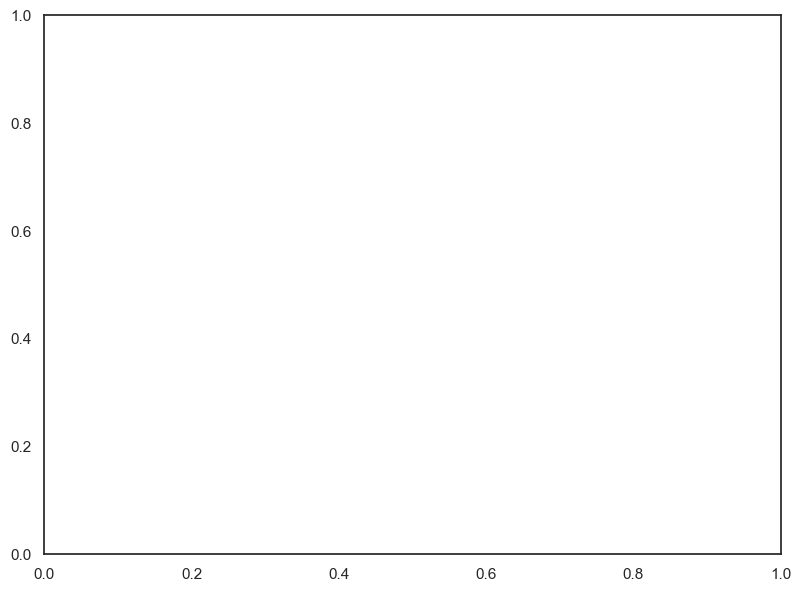

In [11]:
for i in range(10):
    fig, ax = plt.subplots(1,1,figsize=(9.5,7))
    sns.set_theme(style="white")
    #flatui = ["#348634", "#7eb17e", "#c8dcc8", "#efcece", "#e98888","#e24343"]
    flatui = ["#279327", "#75b975", "#c4e0c4", "#f5c8c8", "#f97878","#fd2828"]
    sns.pointplot(x = 'bins',y = var[i],data = olhc_n,ax = ax,join = False,ci = 'sd',
                #   catsize = 1,
                  scale=2.25,
                    order = ['(-10.0, -4.2]','(-4.2, -1.4]','(-1.4, 0.0]','(0.0, 1.4]','(1.4, 4.2]','(4.2, 10.0]'],
                   palette=sns.color_palette(flatui),
                #    saturation=1,
                   errwidth = 3,markers='o')
    plt.xlabel('$r$',fontdict={'weight': 'normal', 'size': 15})
    plt.ylabel(var[i],fontdict={'weight': 'normal', 'size': 15})
    plt.yticks(fontproperties = 'Times New Roman',size = 14)
    plt.xticks(fontproperties = 'Times New Roman', size = 14)
    #change_width(ax,.5)
    plt.savefig(f'C:/Users/Lenovo/Desktop/pdf_figure/ {var[i]}.pdf',dpi = 300)
    plt.show()

单个指标图像异常的解释

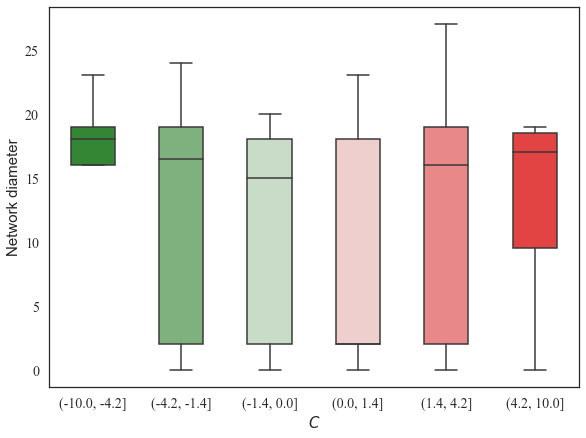

<Figure size 432x288 with 0 Axes>

In [71]:
#直径
plt.figure(figsize=(9.5,7))
sns.set_theme(style="white")
flatui = ["#279327", "#75b975", "#c4e0c4", "#f5c8c8", "#f97878","#fd2828"]
sns.boxplot(x = 'bins',y = 'diameter',data=olhc_6,width=0.5,showfliers=False,palette=sns.color_palette(flatui),
            order = ['(-10.0, -4.2]','(-4.2, -1.4]','(-1.4, 0.0]','(0.0, 1.4]','(1.4, 4.2]','(4.2, 10.0]'])
plt.xlabel('$C$',fontdict={'weight': 'normal', 'size': 15})
plt.ylabel('Network diameter',fontdict={'weight': 'normal', 'size': 15})
plt.yticks(fontproperties = 'Times New Roman',size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.show()
plt.savefig('C:/Users/Lenovo/Desktop/boxplot Diameter .eps',dpi = 300)

经计算，（0.0，1.4]组的直径中位数和下四分位数一致，均为2

In [55]:
dia = olhc_6[olhc_6['bins'] == "(0.0, 1.4]"]
#dia
dia['diameter'].describe()

count    47.000000
mean      8.978723
std       8.380851
min       0.000000
25%       2.000000
50%       2.000000
75%      18.000000
max      23.000000
Name: diameter, dtype: float64

In [12]:
dia = hddf[hddf['bins'] == "(0.0, 1.4]"]
#dia
dia['DAJ'].describe()

count    151.000000
mean      -0.486008
std        0.142154
min       -0.824098
25%       -0.598161
50%       -0.484453
75%       -0.370387
max       -0.161154
Name: DAJ, dtype: float64

# 微博量和厌恶情绪

In [2]:
olhc = pd.read_csv('C:/Users/Lenovo/yan/D/数据/olhc.csv')
olhc.head()

,date,open,high,low,close,volume,anger,disgust,joy,sadness,fear,su
0,2014/12/2,-0.4820,3.6047,-0.5616,3.08,437700,3151,4059,6675,1045,6092,21732
1,2014/12/3,0.1940,2.2025,-1.0657,0.59,562100,3823,4633,9353,1435,7412,27462
2,2014/12/4,0.1343,4.3447,-0.2628,4.34,532700,5060,7280,12161,2836,10107,39274
3,2014/12/5,0.9037,2.6778,-3.0103,1.32,640500,4453,7438,11557,2443,10114,37434
4,2014/12/8,-1.0537,3.5006,-2.0054,2.82,587600,3965,5384,8904,1496,9066,29860


In [3]:
group = [-10,-4.2,-1.4,0,1.4,4.2,10]

In [6]:
olhc['bins'] = pd.cut(olhc['close'], group)
olhc.to_csv('C:/Users/Lenovo/Desktop/hddf.csv')
olhc_bins = olhc['bins'].value_counts().to_frame()
olhc_bins.index.names = ['Bins']
olhc_bins.sort_index(ascending=True, inplace=True)
olhc_bins

,bins
Bins,
"(-10.0, -4.2]",19
"(-4.2, -1.4]",55
"(-1.4, 0.0]",121
"(0.0, 1.4]",151
"(1.4, 4.2]",92
"(4.2, 10.0]",12


In [3]:
hddf = pd.read_csv('C:/Users/Lenovo/yan/D/数据/hddf.csv')

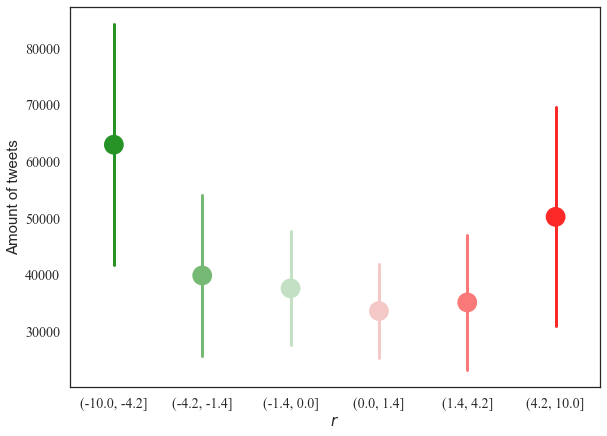

In [11]:
fig, ax = plt.subplots(1,1,figsize=(9.5,7))
sns.set_theme(style="white")
#flatui = ["#348634", "#7eb17e", "#c8dcc8", "#efcece", "#e98888","#e24343"]
flatui = ["#279327", "#75b975", "#c4e0c4", "#f5c8c8", "#f97878","#fd2828"]
sns.pointplot(x = 'bins',y = 'su',data = hddf,ax = ax,join = False,ci = 'sd',catsize = 1,scale=2.25,
                order = ['(-10.0, -4.2]','(-4.2, -1.4]','(-1.4, 0.0]','(0.0, 1.4]','(1.4, 4.2]','(4.2, 10.0]'],
               palette=sns.color_palette(flatui),saturation=1,errwidth = 3,markers='o')
plt.xlabel('$r$',fontdict={'weight': 'normal', 'size': 15})
plt.ylabel('Amount of tweets',fontdict={'weight': 'normal', 'size': 15})
plt.yticks(fontproperties = 'Times New Roman',size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
#change_width(ax,.5)
plt.savefig('C:/Users/Lenovo/Desktop/pdf_figure/amount of tweets.pdf',dpi = 300)
plt.show()

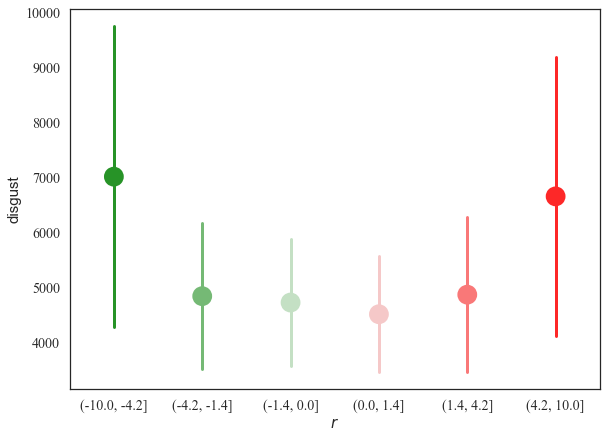

In [12]:
fig, ax = plt.subplots(1,1,figsize=(9.5,7))
sns.set_theme(style="white")
#flatui = ["#348634", "#7eb17e", "#c8dcc8", "#efcece", "#e98888","#e24343"]
flatui = ["#279327", "#75b975", "#c4e0c4", "#f5c8c8", "#f97878","#fd2828"]
sns.pointplot(x = 'bins',y = 'disgust',data = hddf,ax = ax,join = False,ci = 'sd',catsize = 1,scale=2.25,
                order = ['(-10.0, -4.2]','(-4.2, -1.4]','(-1.4, 0.0]','(0.0, 1.4]','(1.4, 4.2]','(4.2, 10.0]'],
               palette=sns.color_palette(flatui),saturation=1,errwidth = 3,markers='o')
plt.xlabel('$r$',fontdict={'weight': 'normal', 'size': 15})
plt.ylabel('disgust',fontdict={'weight': 'normal', 'size': 15})
plt.yticks(fontproperties = 'Times New Roman',size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
#change_width(ax,.5)
plt.savefig('C:/Users/Lenovo/Desktop/pdf_figure/disgust.pdf',dpi = 300)
plt.show()

# 方差分析

#网络属性

In [44]:
model_1 = ols('average_degree~C(bins)', data = olhc_6).fit()
anova_table = anova_lm(model_1)
pd.DataFrame(anova_table)
#不同的分组水平，对于因变量的影响不显著的，p值大于0.05.

,df,sum_sq,mean_sq,F,PR(>F)
C(bins),5.0,0.327310,0.065462,7.281193,0.000003
Residual,165.0,1.483442,0.008991,NaN,NaN


In [52]:
# 进行事后比较分析,比较两两组别之间的差异
print(pairwise_tukeyhsd(olhc_6['average_degree'], olhc_6['bins']))

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
 (-8.5, -4.29] (-4.29, -1.43]  -0.1317 0.0067 -0.2389 -0.0245   True
 (-8.5, -4.29]   (-1.43, 0.0]  -0.1701  0.001 -0.2723 -0.0679   True
 (-8.5, -4.29]    (0.0, 1.43]  -0.1955  0.001 -0.2947 -0.0963   True
 (-8.5, -4.29]   (1.43, 4.29]  -0.1717  0.001 -0.2702 -0.0731   True
 (-8.5, -4.29]    (4.29, 8.5]    -0.11 0.1964 -0.2474  0.0274  False
(-4.29, -1.43]   (-1.43, 0.0]  -0.0384 0.6413  -0.112  0.0352  False
(-4.29, -1.43]    (0.0, 1.43]  -0.0638 0.0908 -0.1332  0.0056  False
(-4.29, -1.43]   (1.43, 4.29]    -0.04 0.5381 -0.1085  0.0285  False
(-4.29, -1.43]    (4.29, 8.5]   0.0217    0.9  -0.096  0.1394  False
  (-1.43, 0.0]    (0.0, 1.43]  -0.0254 0.8187 -0.0868   0.036  False
  (-1.43, 0.0]   (1.43, 4.29]  -0.0016    0.9  -0.062  0.0588  False
  (-1.43, 0.0]    (4.29, 8.5]   0.

group1以及group2表示的是分组的不同水平，分析两个组是否有显著性差异，
reject表示是否拒绝原假设，True表示的是拒绝原假设，说明两组均值有显著性差异

尝试将close只分为两组（涨和跌）

#微博数量方差检验

In [47]:
model_2 = ols('su ~C(bins)', data = olhc).fit()
anova_table = anova_lm(model_2)
pd.DataFrame(anova_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(bins),5.0,1.787029e+10,3.574058e+09,26.586261,1.594018e-23
Residual,444.0,5.968804e+10,1.344325e+08,NaN,NaN


In [48]:
# 进行事后比较分析,比较两两组别之间的差异
print(pairwise_tukeyhsd(olhc['su'], olhc['bins']))

              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
    group1         group2       meandiff  p-adj     lower       upper    reject
-------------------------------------------------------------------------------
 (-8.5, -4.29] (-4.29, -1.43] -24053.2778  0.001 -33064.7265  -15041.829   True
 (-8.5, -4.29]   (-1.43, 0.0] -26788.0974  0.001 -35167.2218 -18408.9731   True
 (-8.5, -4.29]    (0.0, 1.43] -30521.2778  0.001 -38793.4049 -22249.1507   True
 (-8.5, -4.29]   (1.43, 4.29] -29220.7995  0.001 -37773.7698 -20667.8293   True
 (-8.5, -4.29]    (4.29, 8.5] -13715.7323 0.0257 -26416.1262  -1015.3385   True
(-4.29, -1.43]   (-1.43, 0.0]  -2734.8197 0.6704  -8124.6632   2655.0239  False
(-4.29, -1.43]    (0.0, 1.43]     -6468.0 0.0058 -11689.9513  -1246.0487   True
(-4.29, -1.43]   (1.43, 4.29]  -5167.5217 0.0957 -10823.8446    488.8012  False
(-4.29, -1.43]    (4.29, 8.5]  10337.5455 0.0776   -623.3255  21298.4164  False
  (-1.43, 0.0]    (0.0, 1.43]  -3733.180

#厌恶情绪

In [49]:
model_3 = ols('disgust ~C(bins)', data = olhc).fit()
anova_table = anova_lm(model_3)
pd.DataFrame(anova_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(bins),5.0,1.445900e+08,2.891801e+07,15.477046,4.822048e-14
Residual,444.0,8.295895e+08,1.868445e+06,NaN,NaN


In [50]:
print(pairwise_tukeyhsd(olhc['disgust'], olhc['bins']))

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
    group1         group2      meandiff  p-adj    lower      upper    reject
----------------------------------------------------------------------------
 (-8.5, -4.29] (-4.29, -1.43] -2291.5101  0.001 -3353.8967 -1229.1235   True
 (-8.5, -4.29]   (-1.43, 0.0] -2444.1047  0.001 -3431.9447 -1456.2647   True
 (-8.5, -4.29]    (0.0, 1.43] -2635.8977  0.001 -3611.1234 -1660.6719   True
 (-8.5, -4.29]   (1.43, 4.29] -2259.4251  0.001 -3267.7603 -1251.0899   True
 (-8.5, -4.29]    (4.29, 8.5]  -659.9646 0.7801  -2157.252   837.3227  False
(-4.29, -1.43]   (-1.43, 0.0]  -152.5946    0.9  -788.0194   482.8301  False
(-4.29, -1.43]    (0.0, 1.43]  -344.3876 0.5847   -960.019   271.2439  False
(-4.29, -1.43]   (1.43, 4.29]     32.085    0.9  -634.7558   698.9258  False
(-4.29, -1.43]    (4.29, 8.5]  1631.5455 0.0045   339.3356  2923.7553   True
  (-1.43, 0.0]    (0.0, 1.43]  -191.7929 0.8419  -667.3606   283.7748  False

补一个修改cimax和ciglobal的ylabel的图

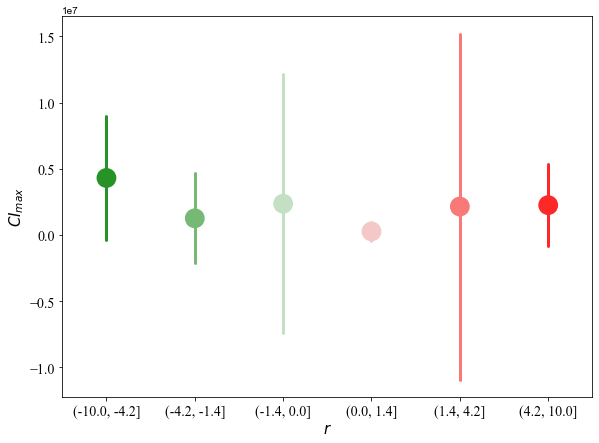

In [7]:
fig, ax = plt.subplots(1,1,figsize=(9.5,7))
sns.set_theme(style="white")
#flatui = ["#348634", "#7eb17e", "#c8dcc8", "#efcece", "#e98888","#e24343"]
flatui = ["#279327", "#75b975", "#c4e0c4", "#f5c8c8", "#f97878","#fd2828"]
sns.pointplot(x = 'bins',y = 'ci_max',data = olhc_n,ax = ax,join = False,ci = 'sd',catsize = 1,scale=2.25,
                order = ['(-10.0, -4.2]','(-4.2, -1.4]','(-1.4, 0.0]','(0.0, 1.4]','(1.4, 4.2]','(4.2, 10.0]'],
               palette=sns.color_palette(flatui),saturation=1,errwidth = 3,markers='o')
plt.xlabel('$r$',fontdict={'weight': 'normal', 'size': 15})
plt.ylabel('$CI_{max}$',fontdict={'weight': 'normal', 'size': 15})
plt.yticks(fontproperties = 'Times New Roman',size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
#change_width(ax,.5)
plt.savefig('C:/Users/Lenovo/Desktop/ci_max.pdf',dpi = 300)
plt.show()

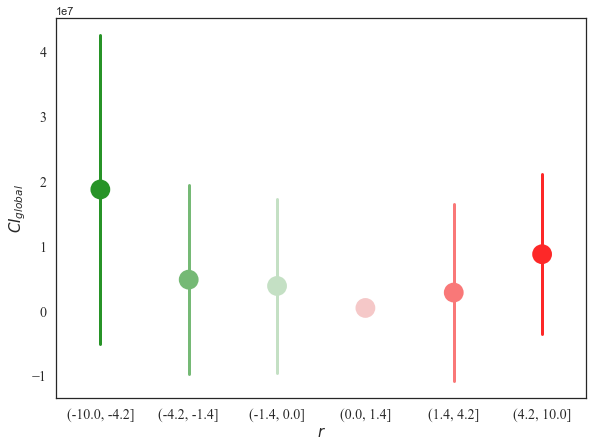

In [8]:
fig, ax = plt.subplots(1,1,figsize=(9.5,7))
sns.set_theme(style="white")
#flatui = ["#348634", "#7eb17e", "#c8dcc8", "#efcece", "#e98888","#e24343"]
flatui = ["#279327", "#75b975", "#c4e0c4", "#f5c8c8", "#f97878","#fd2828"]
sns.pointplot(x = 'bins',y = 'ci_global',data = olhc_n,ax = ax,join = False,ci = 'sd',catsize = 1,scale=2.25,
                order = ['(-10.0, -4.2]','(-4.2, -1.4]','(-1.4, 0.0]','(0.0, 1.4]','(1.4, 4.2]','(4.2, 10.0]'],
               palette=sns.color_palette(flatui),saturation=1,errwidth = 3,markers='o')
plt.xlabel('$r$',fontdict={'weight': 'normal', 'size': 15})
plt.ylabel('$CI_{global}$',fontdict={'weight': 'normal', 'size': 15})
plt.yticks(fontproperties = 'Times New Roman',size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
#change_width(ax,.5)
plt.savefig('C:/Users/Lenovo/Desktop/pdf_figure/ci_global.pdf',dpi = 300)
plt.show()

DAJ/DDJ/DSJ/DFJ的分组图像

In [4]:
var = ['DAJ','DDJ','DSJ','DFJ']

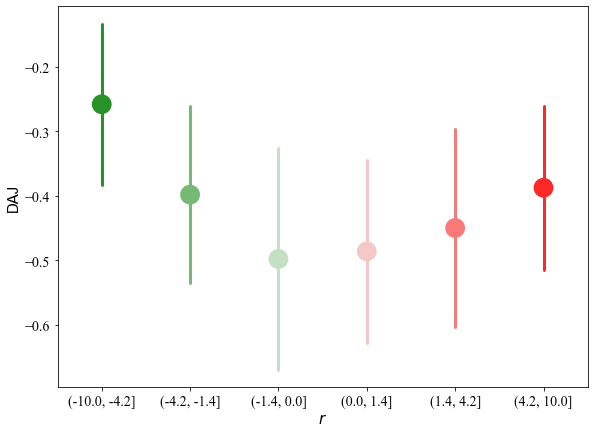

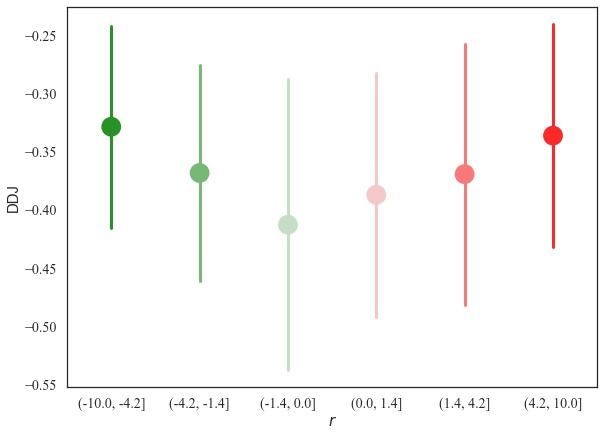

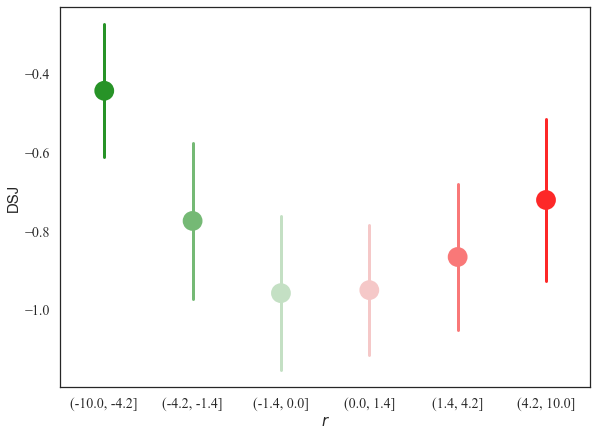

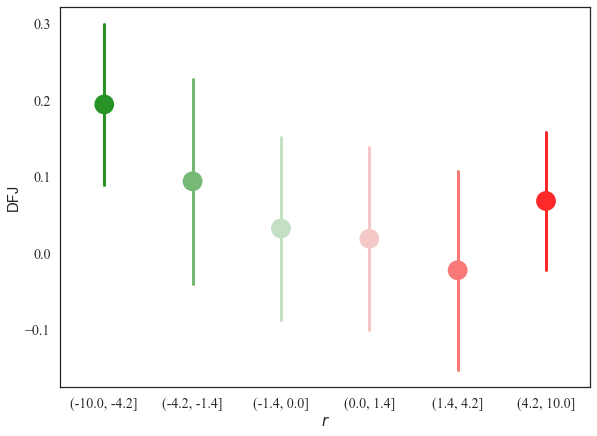

IndexError: list index out of range

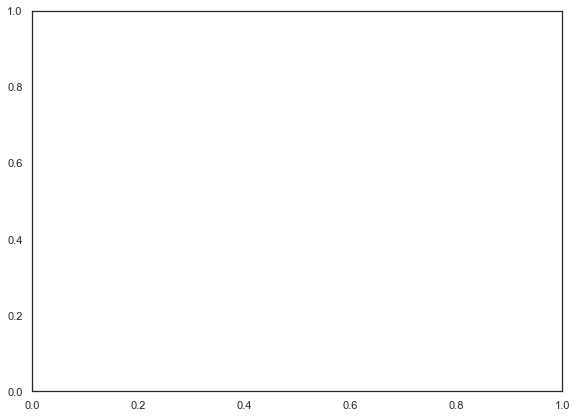

In [5]:
for i in range(5):
    fig, ax = plt.subplots(1,1,figsize=(9.5,7))
    sns.set_theme(style="white")
    #flatui = ["#348634", "#7eb17e", "#c8dcc8", "#efcece", "#e98888","#e24343"]
    flatui = ["#279327", "#75b975", "#c4e0c4", "#f5c8c8", "#f97878","#fd2828"]
    sns.pointplot(x = 'bins',y = var[i],data = hddf,ax = ax,join = False,ci = 'sd',catsize = 1,scale=2.25,
                    order = ['(-10.0, -4.2]','(-4.2, -1.4]','(-1.4, 0.0]','(0.0, 1.4]','(1.4, 4.2]','(4.2, 10.0]'],
                   palette=sns.color_palette(flatui),saturation=1,errwidth = 3,markers='o')
    plt.xlabel('$r$',fontdict={'weight': 'normal', 'size': 15})
    plt.ylabel(var[i],fontdict={'weight': 'normal', 'size': 15})
    plt.yticks(fontproperties = 'Times New Roman',size = 14)
    plt.xticks(fontproperties = 'Times New Roman', size = 14)
    #change_width(ax,.5)
    plt.savefig(f'C:/Users/Lenovo/Desktop/pdf_figure/ {var[i]}.pdf',dpi = 300)
    plt.show()

补充creating和retweeting的bar图

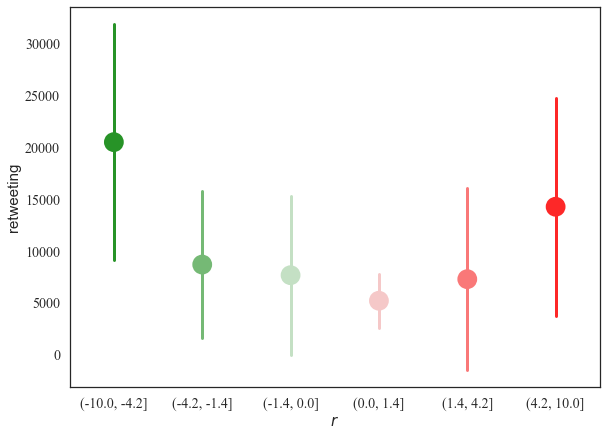

In [17]:
fig, ax = plt.subplots(1,1,figsize=(9.5,7))
sns.set_theme(style="white")
#flatui = ["#348634", "#7eb17e", "#c8dcc8", "#efcece", "#e98888","#e24343"]
flatui = ["#279327", "#75b975", "#c4e0c4", "#f5c8c8", "#f97878","#fd2828"]
sns.pointplot(x = 'bins',y = 'retweeted',data = olhc_n,ax = ax,join = False,ci = 'sd',catsize = 1,scale=2.25,
                order = ['(-10.0, -4.2]','(-4.2, -1.4]','(-1.4, 0.0]','(0.0, 1.4]','(1.4, 4.2]','(4.2, 10.0]'],
               palette=sns.color_palette(flatui),saturation=1,errwidth = 3,markers='o')
plt.xlabel('$r$',fontdict={'weight': 'normal', 'size': 15})
plt.ylabel('retweeting',fontdict={'weight': 'normal', 'size': 15})
plt.yticks(fontproperties = 'Times New Roman',size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
#change_width(ax,.5)
plt.savefig('C:/Users/Lenovo/Desktop/retweeting_pointplot.pdf',dpi = 300)
plt.show()

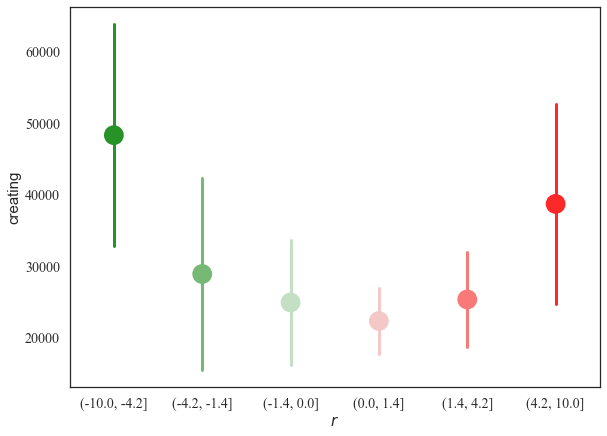

In [18]:
fig, ax = plt.subplots(1,1,figsize=(9.5,7))
sns.set_theme(style="white")
#flatui = ["#348634", "#7eb17e", "#c8dcc8", "#efcece", "#e98888","#e24343"]
flatui = ["#279327", "#75b975", "#c4e0c4", "#f5c8c8", "#f97878","#fd2828"]
sns.pointplot(x = 'bins',y = 'original',data = olhc_n,ax = ax,join = False,ci = 'sd',catsize = 1,scale=2.25,
                order = ['(-10.0, -4.2]','(-4.2, -1.4]','(-1.4, 0.0]','(0.0, 1.4]','(1.4, 4.2]','(4.2, 10.0]'],
               palette=sns.color_palette(flatui),saturation=1,errwidth = 3,markers='o')
plt.xlabel('$r$',fontdict={'weight': 'normal', 'size': 15})
plt.ylabel('creating',fontdict={'weight': 'normal', 'size': 15})
plt.yticks(fontproperties = 'Times New Roman',size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
#change_width(ax,.5)
plt.savefig('C:/Users/Lenovo/Desktop/creating_pointplot.pdf',dpi = 300)
plt.show()

补充DNP的图

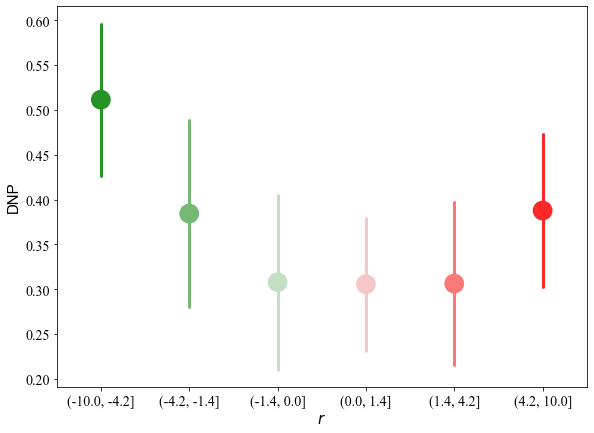

In [4]:
fig, ax = plt.subplots(1,1,figsize=(9.5,7))
sns.set_theme(style="white")
#flatui = ["#348634", "#7eb17e", "#c8dcc8", "#efcece", "#e98888","#e24343"]
flatui = ["#279327", "#75b975", "#c4e0c4", "#f5c8c8", "#f97878","#fd2828"]
sns.pointplot(x = 'bins',y = 'DNP',data = hddf,ax = ax,join = False,ci = 'sd',catsize = 1,scale=2.25,
                order = ['(-10.0, -4.2]','(-4.2, -1.4]','(-1.4, 0.0]','(0.0, 1.4]','(1.4, 4.2]','(4.2, 10.0]'],
               palette=sns.color_palette(flatui),saturation=1,errwidth = 3,markers='o')
plt.xlabel('$r$',fontdict={'weight': 'normal', 'size': 15})
plt.ylabel('DNP',fontdict={'weight': 'normal', 'size': 15})
plt.yticks(fontproperties = 'Times New Roman',size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
#change_width(ax,.5)
plt.savefig('C:/Users/Lenovo/Desktop/论文补充资料/DNP.pdf',dpi = 300)
plt.show()